# Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Import dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Feature Scaling

In [3]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape((len(y),1)))

# Fitting the SVR

In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

C:\Users\88018\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Prediction

In [5]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))

In [6]:
print(y_pred)

[170370.0204065]


# Visualising the Regression results

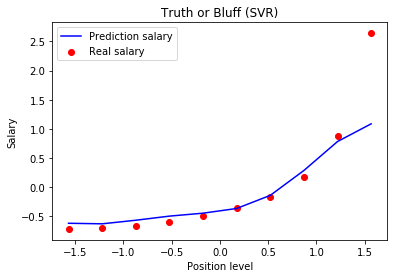

In [7]:
plt.scatter(x, y, color = 'red',label='Real salary')
plt.plot(x, regressor.predict(x), color = 'blue',label='Prediction salary')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()